In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)
from ACO_graph import ACO_Graph
import matplotlib.pyplot as plt

# Get data from website

In [6]:
data_site = "https://people.sc.fsu.edu/~jburkardt/datasets/tsp/att48_xy.txt"
raw_data = urlopen(data_site).read()
soup = BeautifulSoup(raw_data, features="html.parser")
text_points = soup.get_text()
list_points = list(map(lambda x: list(map(lambda y: int(y), x.split())), text_points.split('\n')))[:-1]

# Constantes

In [7]:
qt_formigas = 30
rho = 0.25
alpha = 0.5
beta = 0.7
iteracoes = 500 # quantidade de iterações que irão acontecer até a parada da otimização
repeticoes = 10

# Ant Colony

  2%|▏         | 10/500 [00:04<03:44,  2.18it/s]######## iteracao 10 ##########


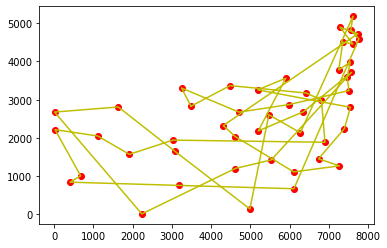

  4%|▍         | 20/500 [00:12<05:20,  1.50it/s]######## iteracao 20 ##########


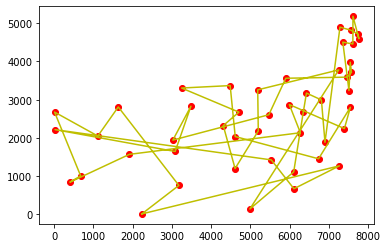

  6%|▌         | 29/500 [00:18<05:08,  1.53it/s]


KeyboardInterrupt: 

In [8]:
myACO = ACO_Graph(list_points, alpha, beta, rho)
myACO.search(qt_formigas, iteracoes, plot_at_every = 10, method='aco')

## 10 executions

In [5]:
results_aco = []
for _ in range(repeticoes):
    myACO = ACO_Graph(list_points, alpha, beta, rho)
    _, distancia = myACO.search(qt_formigas, iteracoes, plot_at_every = None, method='aco')
    results_aco.append(distancia)

100%|██████████| 500/500 [05:53<00:00,  1.41it/s]


# MAX-MIN Ant System

In [6]:
# myACO_maxmin = ACO_Graph(list_points, alpha, beta, rho)
# myACO_maxmin.search(qt_formigas, iteracoes, plot_at_every = 10, method='max_min', tal_saturation=[0.2, 0.8])

## 10 executions

In [7]:
results_mm = []
for _ in range(repeticoes):
    myACO_maxmin = ACO_Graph(list_points, alpha, beta, rho)
    _, distancia = myACO_maxmin.search(qt_formigas, iteracoes, plot_at_every = None, method='max_min', tal_saturation=[0.2, 0.8])
    results_mm.append(distancia)

100%|██████████| 500/500 [06:16<00:00,  1.33it/s]


# Box Plot

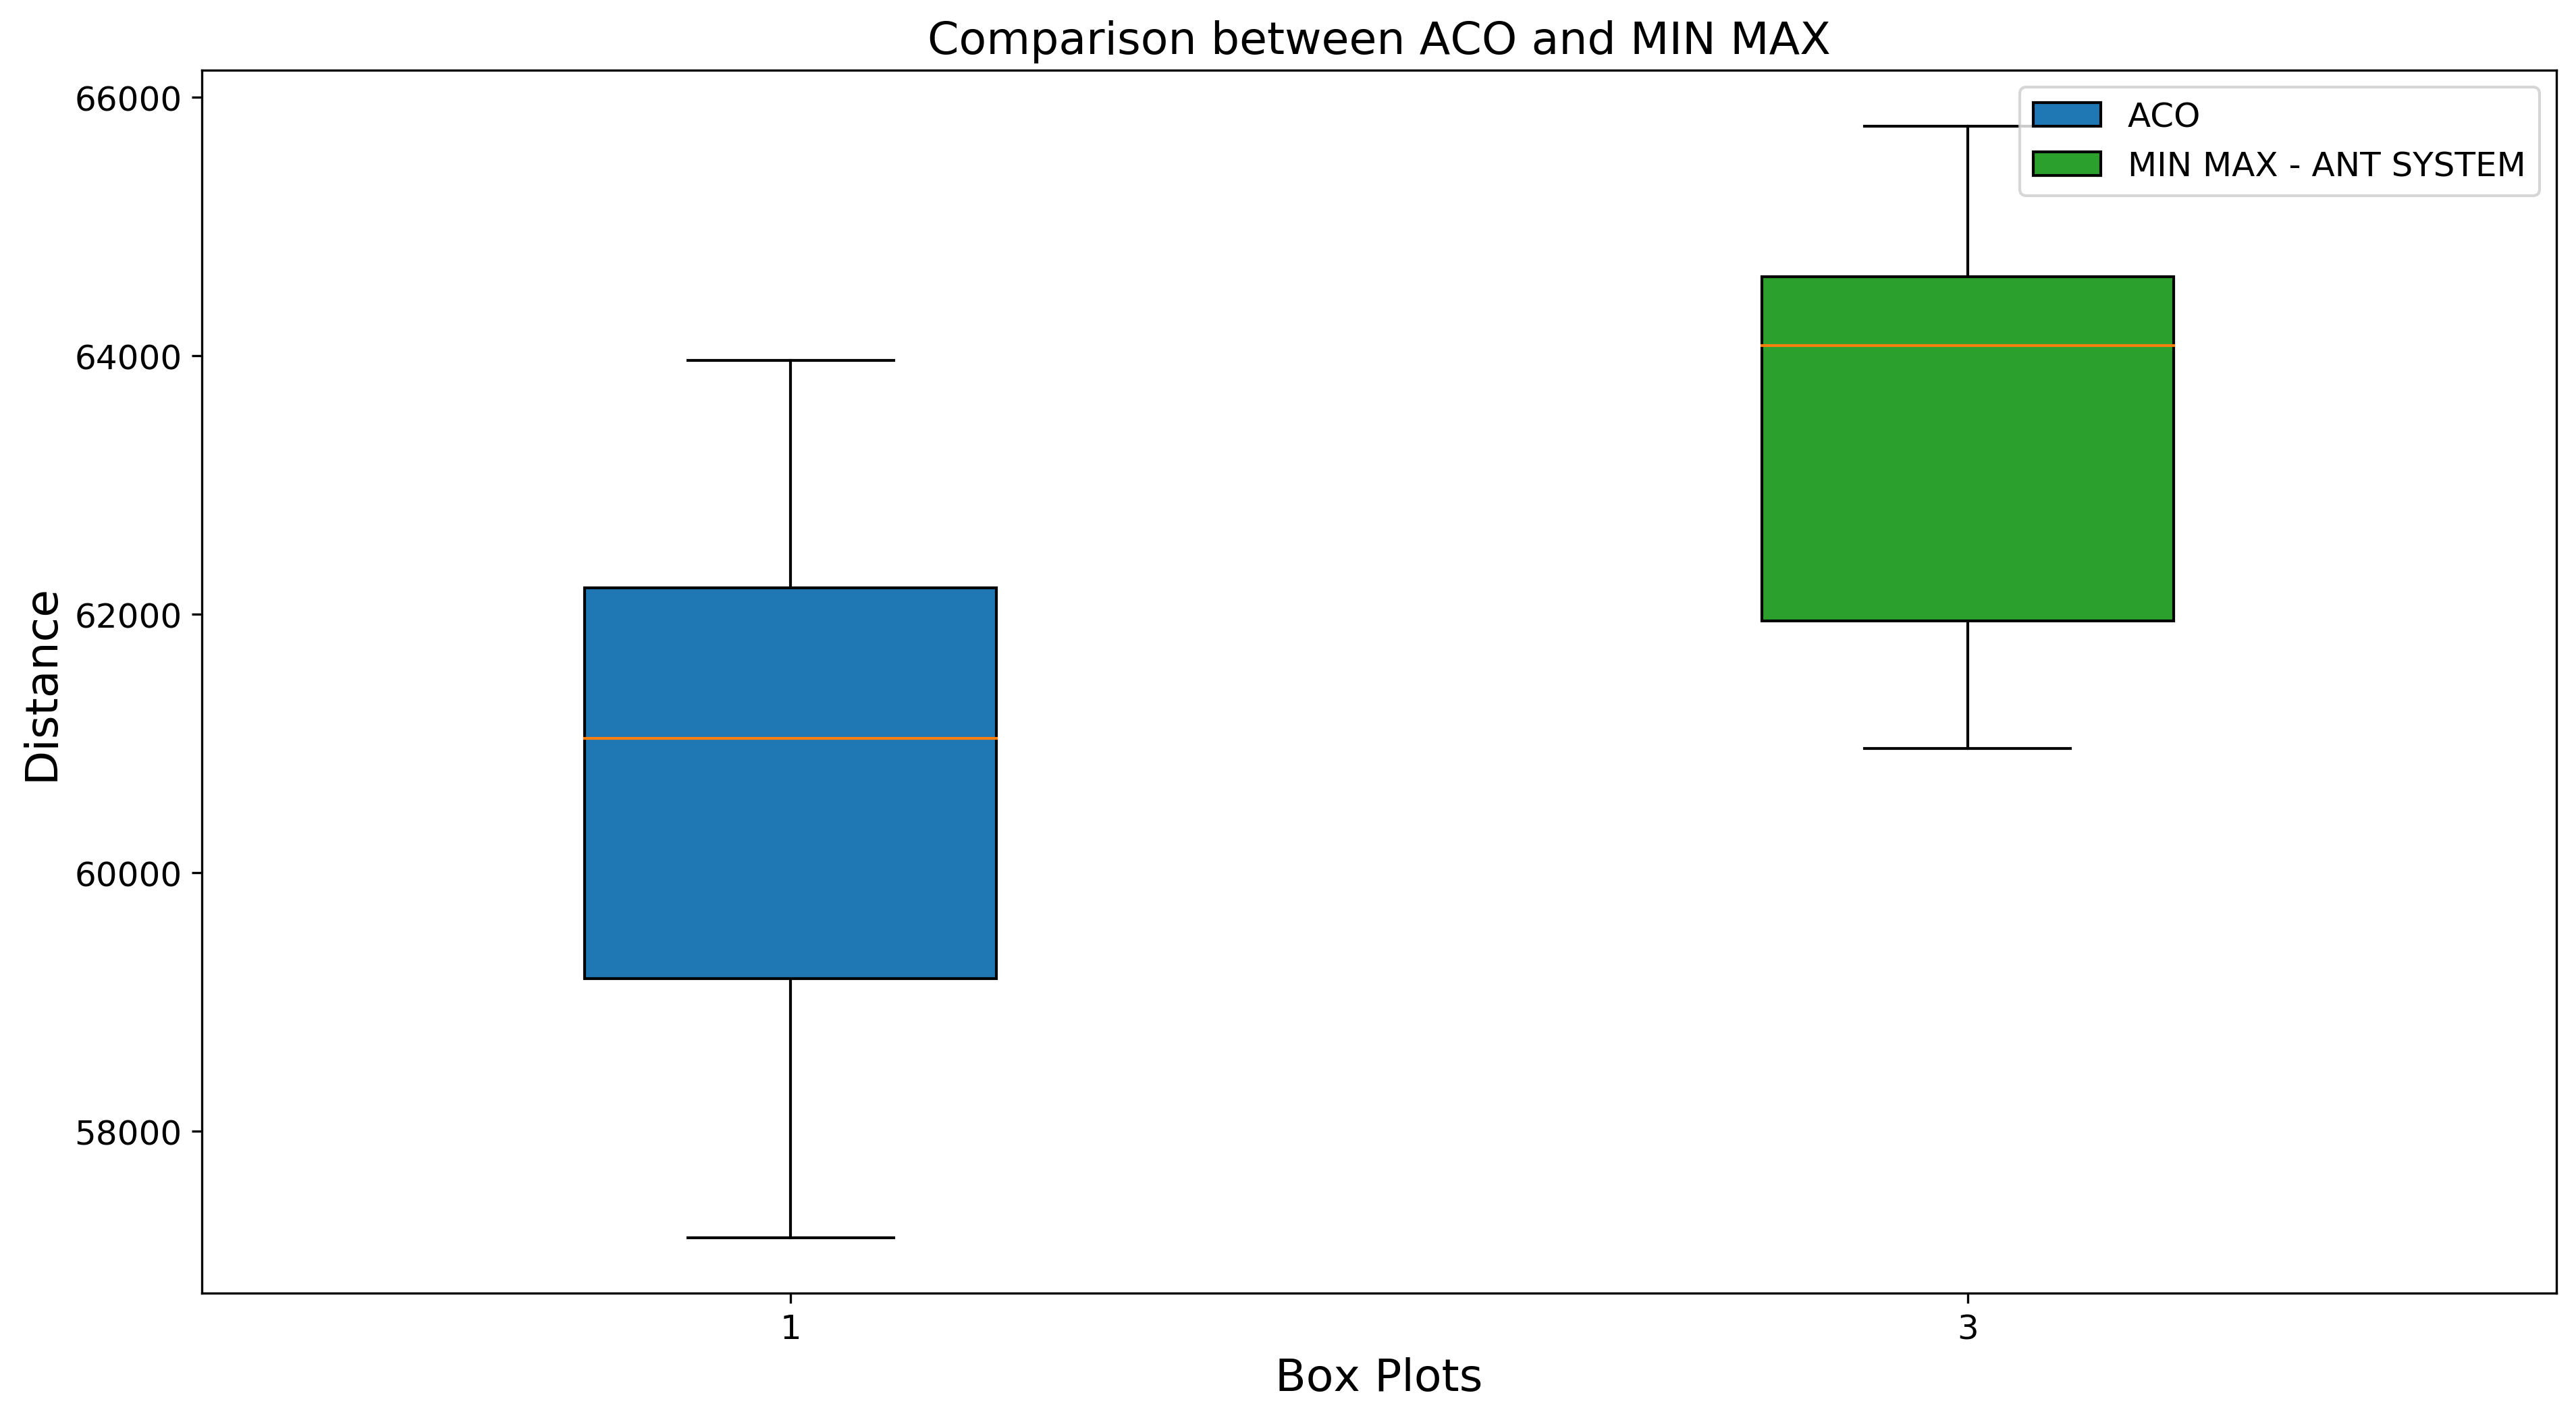

In [8]:
fig, ax = plt.subplots(figsize=(15,8), dpi=300)
bp1 = ax.boxplot(results_aco, positions=[1], widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))

bp2 = ax.boxplot(results_mm, positions=[3], widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C2"))

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['ACO', 'MIN MAX - ANT SYSTEM'], loc='upper right', fontsize='large')

ax.set_xlim(0,4)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title('Comparison between ACO and MIN MAX', fontdict={'size':16})
ax.set_xlabel('Box Plots', fontdict={'size':16})
ax.set_ylabel('Distance', fontdict={'size':16})
plt.show()
fig.savefig('resultado.png',dpi=300)